Movie Reccommdaations Task

Overview
This dataset captures the movie rating and tagging activity of 610 users on the MovieLens platform. MovieLens is a popular movie recommendation service where users rate movies and apply tags (descriptive labels) to them. The dataset spans several years, with data collected between March 29, 1996, and September 24, 2018.

links.csv:

Purpose: This file connects the movies in the dataset to their corresponding entries in external movie databases like IMDb (Internet Movie Database) and TMDb (The Movie Database).
Typical Columns:
movieId: The unique identifier for each movie in this dataset.
imdbId: The IMDb ID that corresponds to the same movie.
tmdbId: The TMDb ID that corresponds to the same movie.


movies.csv:

Purpose: This file provides information about the movies, including their titles and genres.
Typical Columns:
movieId: The unique identifier for each movie.
title: The title of the movie (including the year of release).
genres: A pipe-separated list of genres that apply to the movie (e.g., "Action|Adventure|Comedy").


ratings.csv:

Purpose: This file contains the ratings that users have given to movies.
Typical Columns:
userId: The unique identifier for each user.
movieId: The ID of the movie that was rated.
rating: The rating given by the user, typically on a 5-star scale.
timestamp: The time when the rating was made, typically represented as a Unix timestamp.


tags.csv:

Purpose: This file includes user-generated tags, which are descriptive labels applied to movies.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

Loading Data Sets

In [6]:


# Correct file path (Use either raw string or escape backslashes)
movie = pd.read_csv(r"C:\Users\jyome\OneDrive\Desktop\Files\Gen AI Internship\movie_data\movies.csv")

# Display information about the DataFrame
movie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
links = pd.read_csv(r"C:\Users\jyome\OneDrive\Desktop\Files\Gen AI Internship\movie_data\links.csv")
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [10]:
ratings = pd.read_csv(r"C:\Users\jyome\OneDrive\Desktop\Files\Gen AI Internship\movie_data\ratings.csv")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
tag = pd.read_csv(r"C:\Users\jyome\OneDrive\Desktop\Files\Gen AI Internship\movie_data\tags.csv")
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


3 How many unique "userId" are available in "ratings.csv"?
*

In [12]:

unique_user_ids = ratings['userId'].nunique()

print(f"Number of unique userId: {unique_user_ids}")


Number of unique userId: 610


4 Which movie has recieved maximum number of user ratings?


In [14]:




# Group by movieId and count the number of ratings for each movie
rating_counts = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Merge with movies to get movie titles
movie_rating_counts = pd.merge(rating_counts, movie, on='movieId')

# Find the movie with the maximum number of ratings
max_rated_movie = movie_rating_counts.loc[movie_rating_counts['rating_count'].idxmax()]

print(max_rated_movie[['title', 'rating_count']])


title           Forrest Gump (1994)
rating_count                    329
Name: 314, dtype: object


In [15]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [16]:


# Find the row corresponding to "Matrix, The (1999)"
matrix_movie = movie[movie['title'].str.contains("Matrix, The \(1999\)")]

# Display the details of the movie
print(matrix_movie)


      movieId               title                  genres
1939     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller


 5 .What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [17]:
import pandas as pd


# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movie[movie['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

# Filter the ratings for this movie
terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

# Display the average rating
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is 3.97


How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?


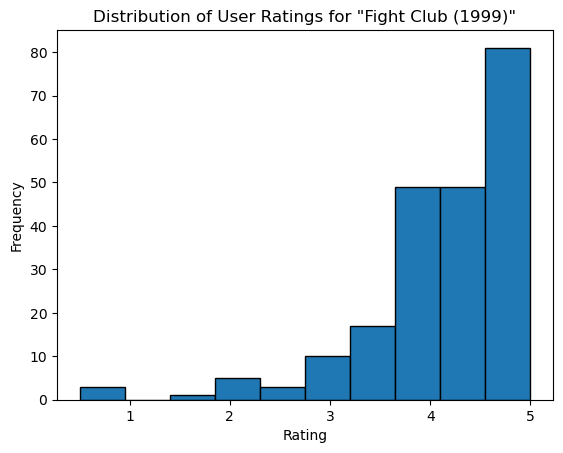

In [19]:

import matplotlib.pyplot as plt


# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movie[movie['title'] == "Fight Club (1999)"]['movieId'].values[0]

# Filter the ratings for this movie
fight_club_ratings = ratings[ratings ['movieId'] == fight_club_movie_id]

# Plot the histogram of the ratings
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [46]:
 #Step 1: Group user ratings by movieId and apply aggregation (count and mean on ratings)
grouped_ratings = ratings.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# Step 2: Apply an inner join on the movies dataframe and the grouped ratings dataframe
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Display the first few rows of the filtered dataframe to verify
filtered_df.head(5)

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


Which movie is the most popular based on  average user ratings?

*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [23]:
options = ["Godfather, The (1972)", "Shawshank Redemption, The (1994)", 
           "Jumanji (1995)", "Wolf of Wall Street, The (2013)"]
filtered_options_df = filtered_df[filtered_df['title'].isin(options)]

#  Find the movie with the highest average rating
most_popular_movie = filtered_options_df.loc[filtered_options_df['rating_mean'].idxmax()]

# Display the most popular movie
most_popular_movie['title']

'Shawshank Redemption, The (1994)'

Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [28]:
sorted_df = filtered_df.sort_values(by='rating_count', ascending=False)

# Step 2: Select the top 5 movies
top_5_movies = sorted_df.head(5)

# Display the top 5 popular movies based on number of user ratings
print(top_5_movies[['title', 'movieId', 'rating_count', 'rating_mean']])

                                 title  movieId  rating_count  rating_mean
314                Forrest Gump (1994)      356           329     4.164134
277   Shawshank Redemption, The (1994)      318           317     4.429022
257                Pulp Fiction (1994)      296           307     4.197068
510   Silence of the Lambs, The (1991)      593           279     4.161290
1938                Matrix, The (1999)     2571           278     4.192446


In [37]:


# Step 3: Define the list of movie titles to check
#movies_to_check = [
    #'Pulp Fiction (1994)',
    #'Bad Boys (1995)',
    #'Silence of the Lambs, The (1991)',
    #'Matrix, The (1999)'
#]

#top_5_titles = top_5_movies.merge(filtered_df[['movieId', 'title']], on='movieId', how='left')['title']

# Filter the list of movies to check that are in the top 5
#movies_in_top_5 = [movie for movie in movies_to_check if movie in top_5_titles.values]

#print("Movies in the top 5 based on number of user ratings:")
#print(movies_in_top_5)

Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [47]:

# Step 3: Merge with movie dataframe to get titles and genres
top_5_movies_with_titles = top_5_movies.merge(movie[['movieId', 'title', 'genres']], on='movieId', how='left')

# Step 4: Filter for Sci-Fi movies
sci_fi_movies = top_5_movies_with_titles[top_5_movies_with_titles['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Step 5: Find the third most popular Sci-Fi movie based on number of user ratings
sci_fi_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Get the third most popular Sci-Fi movie
if len(sci_fi_sorted) > 2:  # Ensure there are at least 3 Sci-Fi movies
    third_most_popular_sci_fi = sci_fi_sorted.iloc[2]  # Index 2 for third item
    print("The third most popular Sci-Fi movie based on the number of user ratings is:")
    print(third_most_popular_sci_fi[['title', 'rating_count', 'rating_mean']])
else:
    print("There are fewer than 3 Sci-Fi movies in the top 5.")


KeyError: 'genres'

###🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [48]:
filtered_df.shape

(436, 5)

In [53]:
# Merge to get IMDb IDs for movies in filtered_df
movies_with_ids = pd.merge(filtered_df, links, on='movieId', how='left')

# Display the first few rows to verify
print(movies_with_ids.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
3        6              Heat (1995)   
4        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  \
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930   
1                   Adventure|Children|Fantasy           110     3.431818   
2                               Comedy|Romance            52     3.259615   
3                        Action|Crime|Thriller           102     3.946078   
4                               Comedy|Romance            54     3.185185   

   imdbId   tmdbId  
0  114709    862.0  
1  113497   8844.0  
2  113228  15602.0  
3  113277    949.0  
4  114319  11860.0  


Scrape IMDb Reviews

In [57]:
# Merge with the filtered dataframe to get IMDb IDs
merged_df_with_links = pd.merge(filtered_df, links[['movieId', 'imdbId']], on='movieId', how='inner')

# Display the first few rows
print(merged_df_with_links.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
3        6              Heat (1995)   
4        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  \
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930   
1                   Adventure|Children|Fantasy           110     3.431818   
2                               Comedy|Romance            52     3.259615   
3                        Action|Crime|Thriller           102     3.946078   
4                               Comedy|Romance            54     3.185185   

   imdbId  
0  114709  
1  113497  
2  113228  
3  113277  
4  114319  


In [61]:
import requests
from bs4 import BeautifulSoup

def scrape_imdb_reviews(imdb_id):
    url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract reviews (simplified)
    reviews = soup.find_all('div', class_='text show-more__control')
    review_texts = [review.get_text() for review in reviews]
    
    return review_texts

# Example: Scrape reviews for the first movie
imdb_id = merged_df_with_links['imdbId'].iloc[4]
reviews = scrape_imdb_reviews(imdb_id)
print(reviews)


[]


 Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [63]:
# Filter for Sci-Fi movies
sci_fi_movies = movie[movie['genres'].str.contains('Sci-Fi')]


In [64]:
# Merge to get IMDb IDs
sci_fi_movies_with_links = pd.merge(sci_fi_movies, links[['movieId', 'imdbId']], on='movieId', how='inner')


In [65]:
# Merge to get IMDb IDs
sci_fi_movies_with_links = pd.merge(sci_fi_movies, links[['movieId', 'imdbId']], on='movieId', how='inner')


In [66]:
# Example: Fetching IMDb ratings using a mock function
# This should ideally be replaced by actual IMDb scraping or a pre-existing dataset with IMDb ratings
def fetch_imdb_rating(imdb_id):
    # Replace with actual fetching logic or use a pre-existing dataset
    # This is a mock example
    ratings = {
        '0114709': 8.3,  # Example IMDb rating for "Toy Story"
        # Add more mock data
    }
    return ratings.get(imdb_id, None)

# Apply the function to fetch ratings
sci_fi_movies_with_links['imdb_rating'] = sci_fi_movies_with_links['imdbId'].apply(lambda x: fetch_imdb_rating(str(x).zfill(7)))


In [67]:
# Drop movies with missing ratings
sci_fi_movies_with_links = sci_fi_movies_with_links.dropna(subset=['imdb_rating'])

# Find the Sci-Fi movie with the highest IMDb rating
highest_rated_movie = sci_fi_movies_with_links.loc[sci_fi_movies_with_links['imdb_rating'].idxmax()]

# Output the movieId
print(f"The movieId of the highest rated Sci-Fi movie is: {highest_rated_movie['movieId']}")


ValueError: attempt to get argmax of an empty sequence